### Scikit Learn 

In [42]:
import pandas as pd

Carregando o dataset das casas de Boston

In [43]:
data = pd.read_csv('BostonHousing.csv')

In [44]:
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Dividindo os dados de entrada (X) e saídas (y) 

In [45]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

Importando os modelos a serem usados

In [46]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt

Treinando o modelo com base em X e y

In [47]:
model = KNeighborsRegressor().fit(X, y)

In [48]:
pred = model.predict(X)

Plotando em gráfico de pontos predição x real

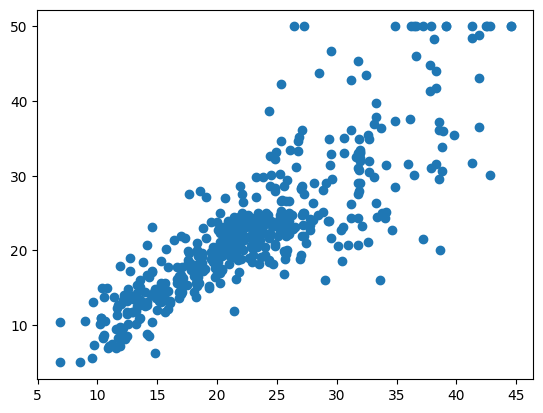

In [49]:
plt.scatter(pred, y)

Como alguns dados estão em métricas diferentes, iremos importar um módulo para normalização dos dados, o módulo **StardardScaler**

Além disso, iremos usar o módulo ***Pipeline***, que define o Pipeline do processo, por meio dele, podemos definir quais processos serão feitos antes de treinar o modelo.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [51]:
# Aqui estamos definindo a Pipeline do modelo, normalizando os dados e definindo qual modelo será usado.
pipe = Pipeline([('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

Iremos agora utilizar um novo módulo, ***GridSearchCV***, que é usado para identificar quais os melhores hiperparâmetros para um modelo.

In [55]:
from sklearn.model_selection import GridSearchCV

Temos como parâmetros:  

* estimator: modelo que será testado por GridSearchCV<br>
                        
* param_grid: dicionário que contém como chaves os nomes dos possíveis parâmetros dos modelos, seguidos por uma lista de valores a serem testados<br>

* cv: indica o número de folds em que os dados serão divididos e depois testados.

Basicamente, GridSearchCV recebe o modelo e os parâmetros com diversos valores associados à eles. O GridSearchCV executa várias vezes, com todas as combinações possíveis de valores fornecidos para hiperparâmetros e retorna um modelo com as melhores combinações de valores para os hiperparâmetros fornecidos

In [63]:
model = GridSearchCV(estimator = pipe,
            param_grid =  {'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
            cv = 3)

In [64]:
model.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

Após o treino, é possível ver quais as melhores combinações de parâmetros dentre todas as testadas, as que retornam os melhores resultados.

In [66]:
model.best_params_

{'model__n_neighbors': 3}

##### Quando usar ScikitLearn, é muito útil sempre definir o Pipeline do processo, definir o que será feito com os dados e depois com o modelo, logo depois é extremamente útil definir o GridSearch, afim de testar o modelo e achar os melhores hiperparâmetros.